<a href="https://colab.research.google.com/github/KhizarSultan/Power_Consumption_Time_Series_Analysis_Using_Deep_Learning/blob/master/power_consumption_time_series_analysis_using_deep_learning_by_Khizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This project will analyse the time series power consumption data (2 million rows) using deep learning 
### The aim is just to show how to build the simplest Long Short-Term Memory (LSTM) recurrent neural network for the data.

#### lets do!

The description of data can be found here:
http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power (output label): household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# data = https://drive.google.com/open?id=1Qm1L8izAJ-8NAt2ZROmtAVSf1CNEPyGH
id = "1Qm1L8izAJ-8NAt2ZROmtAVSf1CNEPyGH"

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id':id})
download.GetContentFile('household_power_consumption.txt')
print(f"data has been download to google colab")

data has been download to google colab


In [0]:
df = pd.read_csv('household_power_consumption.txt', sep = ';', 
                 parse_dates={'datetime':['Date','Time']},
                 na_values=['nan','?'],
                 index_col = 'datetime'
                 )

In [0]:
df.head(100)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2006-12-16 18:59:00,4.224,0.090,231.96,18.2,0.0,1.0,16.0
2006-12-16 19:00:00,4.070,0.088,231.99,17.4,0.0,1.0,17.0
2006-12-16 19:01:00,3.612,0.090,232.36,15.6,0.0,2.0,16.0


In [0]:
df.shape

(2075259, 7)

In [0]:
df.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [0]:
# remove null values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

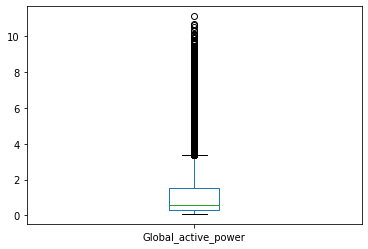

In [0]:
# bearable outliers
df.Global_active_power.plot(kind='box') 

In [0]:
# df.fillna({
#     'Global_active_power':np.mean()
# })
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

In [0]:
cat_pipe = Pipeline([
       ('imputer', Imputer(strategy='median'))              
])
cleaned_data = cat_pipe.fit_transform(df)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
clean_df = pd.DataFrame(cleaned_data,columns=df.columns)
clean_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [0]:
clean_df.set_index(df.index, inplace = True)

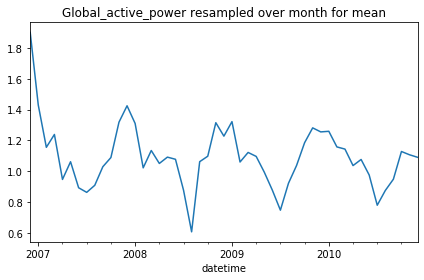

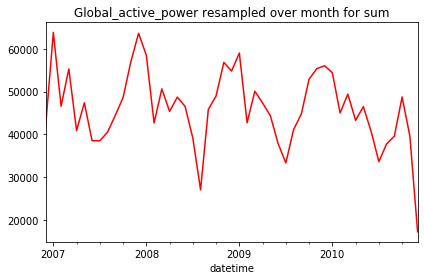

In [0]:
# now explore the monthly wise gloabl active power
monthly_resampled_data_mean = clean_df.Global_active_power.resample('M').mean()
monthly_resampled_data_sum = clean_df.Global_active_power.resample('M').sum()

monthly_resampled_data_mean.plot(title = 'Global_active_power resampled over month for mean')
plt.tight_layout()
plt.show() 

monthly_resampled_data_sum.plot(title = 'Global_active_power resampled over month for sum', color = 'red')
plt.tight_layout()
plt.show() 


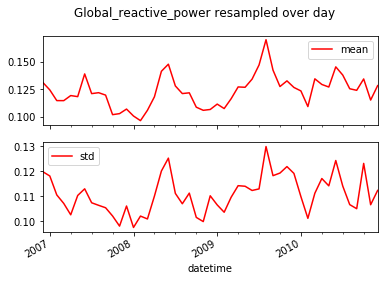

In [0]:
r2 = clean_df.Global_reactive_power.resample('M').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

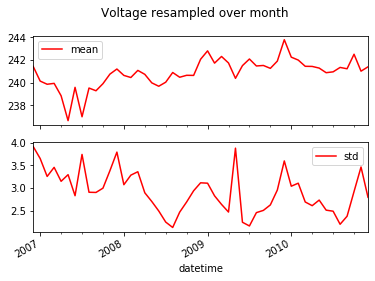

In [0]:
r2 = clean_df.Voltage.resample('M').agg(['mean', 'std'])
r2.plot(subplots = True, title='Voltage resampled over month', color='red')
plt.show()

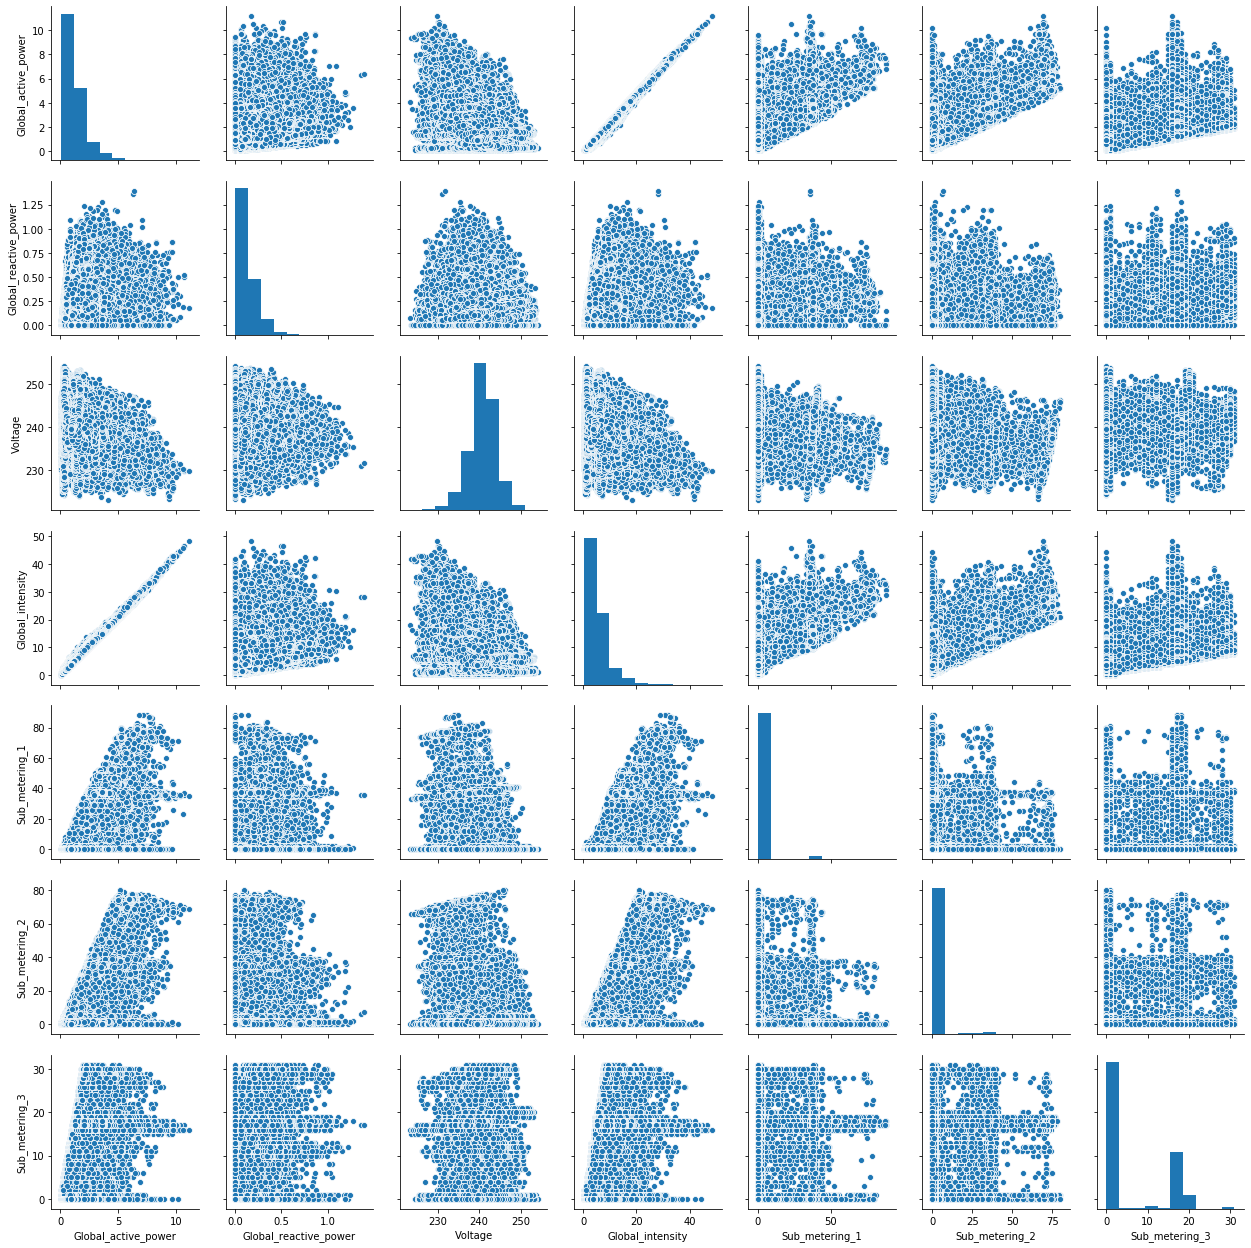

In [0]:
# sns.pairplot(clean_df, kind = 'reg')
sns.pairplot(clean_df)
plt.show()
# KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. 
# It depicts the probability density at different values in a continuous variable. 
# We can also plot a single graph for multiple samples which helps in more efficient data visualization

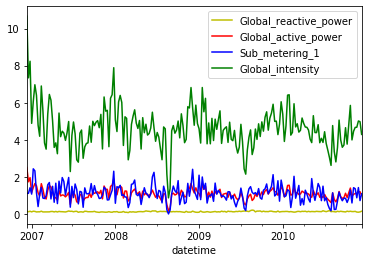

In [0]:
# global active power and gloabl density are directly proportional to each other
clean_df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
clean_df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
clean_df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
clean_df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

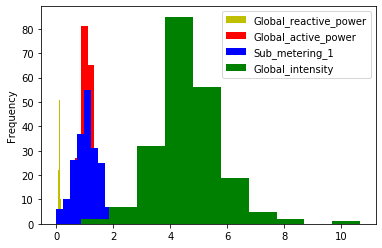

In [0]:
clean_df.Global_reactive_power.resample('W').mean().plot(kind = 'hist', color='y', legend=True)
clean_df.Global_active_power.resample('W').mean().plot(kind = 'hist', color='r', legend=True)
clean_df.Sub_metering_1.resample('W').mean().plot(kind = 'hist', color='b', legend=True)
clean_df.Global_intensity.resample('W').mean().plot(kind = 'hist',color='g', legend=True)
plt.show()

In [0]:
# find the percentage change with the previous row 
data_returns = clean_df.pct_change()
data_returns

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:25:00,0.271347,0.043062,-0.005152,0.250000,NaN,0.0,-0.058824
2006-12-16 17:26:00,0.002612,0.142202,-0.001455,0.000000,NaN,1.0,0.062500
2006-12-16 17:27:00,0.002605,0.008032,0.001929,0.000000,NaN,-0.5,0.000000
2006-12-16 17:28:00,-0.319599,0.051793,0.008300,-0.313043,NaN,0.0,0.000000
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.000000,NaN,0.000416,0.000000,NaN,NaN,NaN
2010-11-26 20:59:00,-0.002114,NaN,-0.001788,0.000000,NaN,NaN,NaN
2010-11-26 21:00:00,-0.006356,NaN,-0.000750,-0.050000,NaN,NaN,NaN


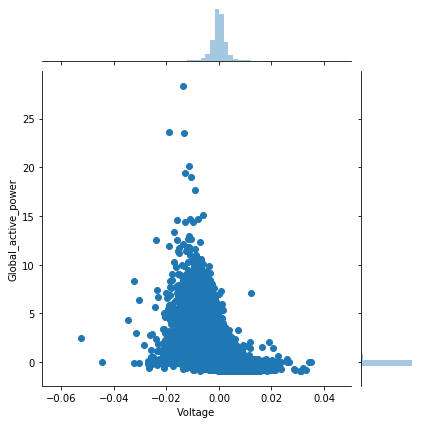

In [0]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

# Machine-Leaning: LSTM Data Preparation and feature engineering
### * I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.  

### * ***Its time to convert Time Series data  into a Supervised Learning Problem***

https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

In [0]:


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

### * In order to reduce the computation time, and also get a quick result to test the model.  One can resmaple the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above.  

In [0]:
resamble_data_hours = clean_df.resample('h').mean() 

In [0]:
resamble_data_hours.shape

(34951, 7)

In [0]:
# its time to normalize the data
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(resamble_data_hours)

In [0]:
scaled # normalized data

array([[0.63681623, 0.29573827, 0.33794529, ..., 0.        , 0.01136636,
        0.78241815],
       [0.54504495, 0.10335773, 0.33550078, ..., 0.        , 0.14465183,
        0.78267595],
       [0.50900588, 0.11007318, 0.28380167, ..., 0.        , 0.03086863,
        0.7741686 ],
       ...,
       [0.15394933, 0.11080499, 0.41082446, ..., 0.17677464, 0.00969131,
        0.        ],
       [0.03053403, 0.09845028, 0.54881238, ..., 0.        , 0.        ,
        0.        ],
       [0.08014666, 0.06427034, 0.67275343, ..., 0.        , 0.        ,
        0.        ]])

In [0]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [0]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.636816,0.295738,0.337945,0.631157,0.000000,0.011366,0.782418,0.545045,0.103358,0.335501,0.541487,0.000000,0.144652,0.782676
2,0.545045,0.103358,0.335501,0.541487,0.000000,0.144652,0.782676,0.509006,0.110073,0.283802,0.502152,0.000000,0.030869,0.774169
3,0.509006,0.110073,0.283802,0.502152,0.000000,0.030869,0.774169,0.488550,0.096987,0.315987,0.481110,0.000000,0.000000,0.778809
4,0.488550,0.096987,0.315987,0.481110,0.000000,0.000000,0.778809,0.455597,0.099010,0.434417,0.449904,0.000000,0.008973,0.798917
5,0.455597,0.099010,0.434417,0.449904,0.000000,0.008973,0.798917,0.322555,0.072536,0.495847,0.323529,0.000000,0.002872,0.205723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34946,0.335098,0.126259,0.181701,0.335605,0.000000,0.000000,0.000000,0.352358,0.146965,0.243573,0.352702,0.007236,0.000000,0.609435
34947,0.352358,0.146965,0.243573,0.352702,0.007236,0.000000,0.609435,0.253138,0.109557,0.313532,0.250956,0.166437,0.023690,0.467131
34948,0.253138,0.109557,0.313532,0.250956,0.166437,0.023690,0.467131,0.153949,0.110805,0.410824,0.152200,0.176775,0.009691,0.000000
34949,0.153949,0.110805,0.410824,0.152200,0.176775,0.009691,0.000000,0.030534,0.098450,0.548812,0.031205,0.000000,0.000000,0.000000


output variables var1(t)(Global Active Power)	var2(t)	var3(t)	var4(t)	var5(t)	var6(t)	var7(t)
we only need var1(t) (Global Active Power) Output variabel so, we should delete other(var2(t)	var3(t)	var4(t)	var5(t)	var6(t)	var7(t)) output varibles

In [0]:
# we only need var1(t) (Global Active Power) Output variabel so,
# we should delete other(var2(t)	var3(t)	var4(t)	var5(t)	var6(t)	var7(t)) output varibles

reframed.drop(reframed.columns[[8,9,10,11,12,13]], inplace=True, axis=1)

In [0]:
reframed.head(10)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.545045
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.509006
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.488550
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.455597
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.322555
6,0.322555,0.072536,0.495847,0.323529,0.0,0.002872,0.205723,0.301032
7,0.301032,0.092251,0.567188,0.301052,0.0,0.001795,0.000000,0.273201
8,0.273201,0.132286,0.580314,0.273434,0.0,0.010050,0.000000,0.501108
9,0.501108,0.176840,0.560615,0.492946,0.0,0.543431,0.000000,0.227338
10,0.227338,0.101033,0.766632,0.228360,0.0,0.012204,0.000000,0.238980


### Now Its time to split the data into training and validation
### it is time series data so we cant split randomly

### * First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data.

In [0]:
# from sklearn.model_selection import train_test_split


#### We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

<ol> 
<li> Samples. One sequence is one sample. A batch is comprised of one or more samples. </li>

<li>Time Steps. One time step is one point of observation in the sample.</li>

<li>
Features. One feature is one observation at a time step.</li>
</ol>

In [0]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25816, 1, 7) (25816,)


# Model architecture

### 1)  LSTM with 100 neurons in the first visible layer 
### 3) dropout 20%
### 4) 1 neuron in the output layer for predicting Global_active_power. 
### 5) The input shape will be 1 time step with 7 features.

### 6) I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
### 7) The model will be fit for 20 training epochs with a batch size of 70.


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Conv1D,MaxPool1D
from tensorflow.keras.optimizers import SGD,Adam

In [0]:
X_train.shape[2]

7

In [0]:
model = Sequential()
model.add(LSTM(100, input_shape = (X_train.shape[1],X_train.shape[2])))

model.add(Dropout(0.2))
# model.add(LSTM(80))
# model.add(Dropout(0.3))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [0]:
# now fit the model
history = None
history = model.fit(x=X_train,y=Y_train,batch_size=70,epochs=50,verbose=2,validation_data=(X_test,Y_test),shuffle=False)

Train on 27660 samples, validate on 6916 samples
Epoch 1/50
27660/27660 - 2s - loss: 0.0110 - val_loss: 0.0092
Epoch 2/50
27660/27660 - 2s - loss: 0.0094 - val_loss: 0.0090
Epoch 3/50
27660/27660 - 2s - loss: 0.0093 - val_loss: 0.0090
Epoch 4/50
27660/27660 - 2s - loss: 0.0093 - val_loss: 0.0090
Epoch 5/50
27660/27660 - 2s - loss: 0.0092 - val_loss: 0.0090
Epoch 6/50
27660/27660 - 2s - loss: 0.0092 - val_loss: 0.0090
Epoch 7/50
27660/27660 - 2s - loss: 0.0092 - val_loss: 0.0090
Epoch 8/50
27660/27660 - 2s - loss: 0.0092 - val_loss: 0.0090
Epoch 9/50
27660/27660 - 2s - loss: 0.0092 - val_loss: 0.0090
Epoch 10/50
27660/27660 - 2s - loss: 0.0092 - val_loss: 0.0089
Epoch 11/50
27660/27660 - 2s - loss: 0.0091 - val_loss: 0.0089
Epoch 12/50
27660/27660 - 2s - loss: 0.0091 - val_loss: 0.0089
Epoch 13/50
27660/27660 - 2s - loss: 0.0091 - val_loss: 0.0089
Epoch 14/50
27660/27660 - 2s - loss: 0.0091 - val_loss: 0.0089
Epoch 15/50
27660/27660 - 2s - loss: 0.0091 - val_loss: 0.0089
Epoch 16/50
276

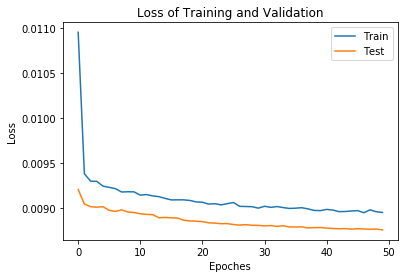

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss of Training and Validation")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend(['Train','Test'], loc = 'upper right')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
# invert predictions
# make a prediction
yhat = model.predict(X_test)

test_X = X_test.reshape((X_test.shape[0], 7))

# # invert scaling for forecast
# test_X[:,-6:] mean only features

inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0] #out put variable

# # invert scaling for actual

test_y = Y_test.values.reshape((len(Y_test), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.602


In [0]:
# without inverse, its is normlize
y_predict = model.predict(X_test)
mse = np.sqrt(mean_squared_error(Y_test,y_predict))
print(f"The Mean Squarred error is: {mse}")

The Mean Squarred error is: 0.09357110091111635


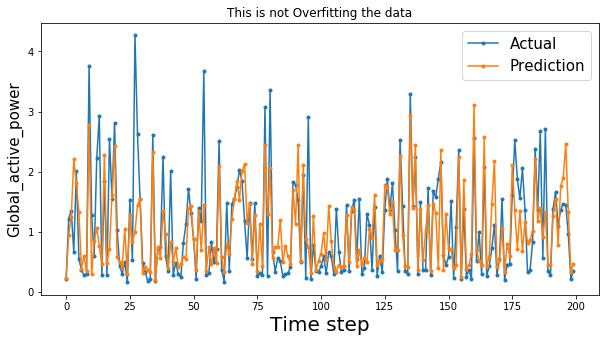

In [0]:
sample = list(range(200))
plt.figure(figsize=(10,5))
plt.plot(sample,inv_y[:200],marker = '.', label = 'Actual')

plt.plot(sample,inv_yhat[:200],marker = '.', label = 'Prediction')
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=20)
plt.legend(fontsize=15)
plt.title("This is not Overfitting the data")
plt.show()

### * Here I have used the LSTM neural network which is now the state-of-the-art for sequencial problems. 

### * In order to reduce the computation time, and get some results quickly, I took the first year of data (resampled over hour) to train the model and the rest of data to test the model.  

### * I put together a very simple LSTM neural-network to show that one can obtain reasonable predictions. However numbers of rows is too high and as a result the computation is very time-consuming (even for the simple model in the above it took few mins to be run on  2.8 GHz Intel Core i7).  The Best is to write the last part of code using Spark (MLlib) running on GPU.  

### * Moreover, the neural-network architecture that I have designed is a toy model. It can be easily improved by adding CNN  and dropout layers.  The CNN is useful here since there are correlations in data (CNN layer is a good way to probe the local structure of data).  

if you have any query related to RNN, Plz feel free to ask at khizersultan007@gmail.com